This notebook takes a look at the nutritional information of Starbucks drinks and to see if there are any interesting patterns that might need to be observed.

In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import rv_discrete

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [64]:
df = pd.read_csv('starbucks-menu-nutrition-drinks.csv')

In [65]:
df.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [66]:
df.rename(columns={'Unnamed: 0':'Drink'}, inplace=True)

In [67]:
df

,Drink,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10
...,...,...,...,...,...,...,...
172,Chocolate Smoothie,320,5,53,8,20,170
173,Strawberry Smoothie,300,2,60,7,16,130
174,Ginger Ale,-,-,-,-,-,-
175,Lemon Ale,-,-,-,-,-,-


In [68]:
df.describe()

,Drink,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
count,177,177,177,177,177,177,177
unique,154,30,15,34,8,17,25
top,Tazo® Bottled Organic Iced Black Tea,-,-,-,-,-,-
freq,2,85,85,85,85,85,85


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Drink      177 non-null    object
 1   Calories   177 non-null    object
 2   Fat (g)    177 non-null    object
 3   Carb. (g)  177 non-null    object
 4   Fiber (g)  177 non-null    object
 5   Protein    177 non-null    object
 6   Sodium     177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB


In [70]:
df['Calories'].unique()

array(['45', '-', '80', '60', '110', '0', '130', '140', '150', '70',
       '120', '30', '90', '210', '200', '50', '10', '5', '320', '430',
       '190', '290', '250', '260', '180', '230', '300', '360', '350',
       '280'], dtype=object)

In [71]:
df.replace('-', 0, inplace=True)

In [72]:
df['Calories'] = df['Calories'].astype(float)

In [73]:
df['Fat (g)'] = df['Fat (g)'].astype(float)

In [74]:
df['Carb. (g)'] = df['Carb. (g)'].astype(float)

In [75]:
df['Fiber (g)'] = df['Fiber (g)'].astype(float)

In [76]:
df['Protein'] = df['Protein'].astype(float)

In [77]:
df['Sodium'] = df['Sodium'].astype(float)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Drink      177 non-null    object 
 1   Calories   177 non-null    float64
 2   Fat (g)    177 non-null    float64
 3   Carb. (g)  177 non-null    float64
 4   Fiber (g)  177 non-null    float64
 5   Protein    177 non-null    float64
 6   Sodium     177 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


In [79]:
df.shape

(177, 7)

In [80]:
df.describe()

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,70.254237,1.214689,12.858757,0.231638,2.158192,30.112994
std,95.605533,3.030941,16.532590,1.043113,4.590981,57.100775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,140.000000,0.000000,27.000000,0.000000,1.000000,15.000000
max,430.000000,26.000000,64.000000,8.000000,20.000000,240.000000


Starbucks drinks are generally very low in fat but quite high in calories and sodium. There are many options for calories though. One could choose to take a low calorie drink like one with zero calories, or they could take the drink with maximum calories of about 430 calories. In other words, the calories are quite dispersed. 

<AxesSubplot:>

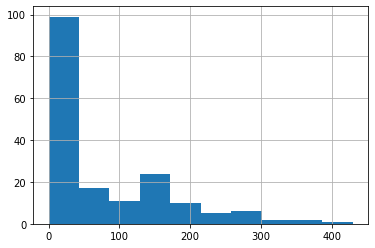

In [81]:
df['Calories'].hist()

As can be seen, most drinks have 0 calories.

<AxesSubplot:>

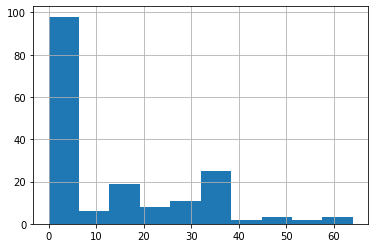

In [82]:
df['Carb. (g)'].hist()

The same can be said of Carbs. Lets see if there is a correlation with calories.

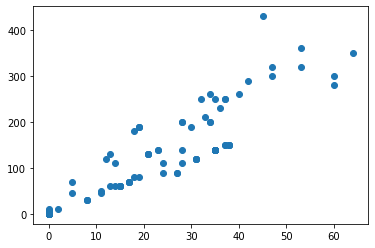

In [83]:
plt.scatter(df['Carb. (g)'], df['Calories'])

In [84]:
df['Carb. (g)'].corr(df['Calories'])

0.9380434827147832

There is an extremely high correlation between carbs and calories

<AxesSubplot:>

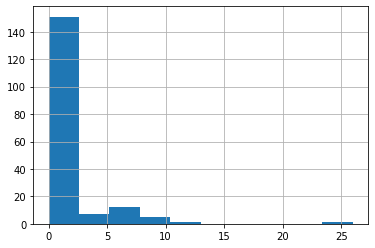

In [85]:
df['Fat (g)'].hist()

In [86]:
df['Fat (g)'].corr(df['Calories'])

0.765981835221696

Fat is highly correlates to Calories

<AxesSubplot:>

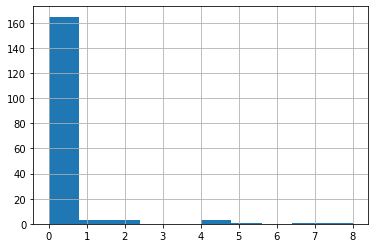

In [87]:
df['Fiber (g)'].hist()

In [88]:
df['Fiber (g)'].corr(df['Calories'])

0.5098888558276631

The correlation between Fiber and Calories is somewhat weaker, but it is still there

<AxesSubplot:>

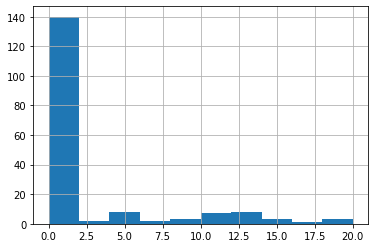

In [89]:
df['Protein'].hist()

<AxesSubplot:>

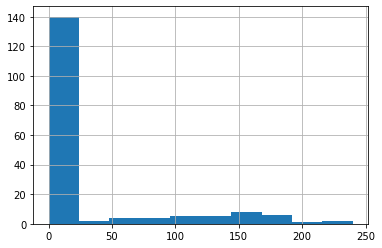

In [90]:
df['Sodium'].hist()

In [91]:
df['Protein'].corr(df['Calories'])

0.8083817976369868

In [92]:
df['Sodium'].corr(df['Calories'])

0.8037953259694633

In [109]:
df['Sodium'].corr(df['Protein'])

0.8484700339819227

It looks like all the nutrients in the dataset are positively correlated.

Since everything in this dataset is so highly correlated, it may be a good idea to try reduce the dimensionality of the dataset and see how it might look.

First, the data needs to be scaled then we can do the PCA

In [102]:
scaler = StandardScaler()
scale_df = scaler.fit_transform(df.drop('Drink', axis=1))

In [104]:
scale_df = pd.DataFrame(scale_df, columns=df.drop('Drink', axis=1).columns)

In [105]:
pca = PCA()

In [106]:
pca_df = pca.fit_transform(scale_df)

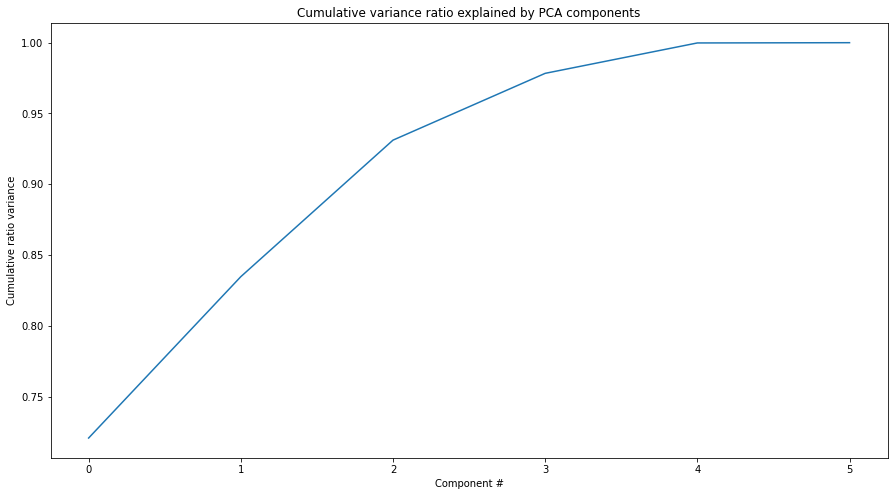

In [108]:
plt.subplots(figsize=(15, 8))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components');

As expected, the first 2 principal components account for about 93% of the variance. The first three account for over 95%. This is typical in a highly correlated dataset. It means this 6 dimensional dataset can be well modelled using 2 to 3 features.

The more there is of one nutrient, the more likely there will be other nutrients as well. With that said, most of the drinks are very low in all the nutrients mentioned in this dataset. Starbucks drinks are quite low in carbs, fat, and calories, so it should be a good place to get drinks for those who are trying to lose weight :).